# Preprocessing

## Import Libraries 

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
print(" loading Packages .....")

 loading Packages .....


## Loading dataset

In [2]:
Data = 'breast-cancer.data'
Names = ['Class','age','menopause','tumor-size','inv-nodes','node-caps','deg-malig','breast','breast-quad','irradiat']
Dataset = pd.read_csv(Data,header=None,names=Names)

In [3]:
Dataset.head(10)
#Dataset

,Class,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat
0,no-recurrence-events,30-39,premeno,30-34,0-2,no,NaN,left,left_low,no
1,no-recurrence-events,40-49,premeno,20-24,0-2,no,2.0,right,right_up,no
2,no-recurrence-events,40-49,premeno,20-24,0-2,no,NaN,left,left_low,no
3,no-recurrence-events,60-69,ge40,15-19,0-2,no,2.0,right,left_up,no
4,no-recurrence-events,40-49,premeno,0-4,0-2,no,2.0,right,right_low,no
5,no-recurrence-events,60-69,ge40,15-19,0-2,no,2.0,left,left_low,no
6,no-recurrence-events,50-59,premeno,25-29,0-2,no,2.0,left,left_low,no
7,no-recurrence-events,60-69,ge40,20-24,0-2,no,1.0,left,left_low,no
8,no-recurrence-events,40-49,premeno,50-54,0-2,no,2.0,left,left_low,no
9,no-recurrence-events,40-49,premeno,20-24,0-2,no,2.0,right,left_up,no


## Missing data

In [8]:
Dataset.isnull().sum()

Class          0
age            0
menopause      0
tumor-size     0
inv-nodes      0
node-caps      0
deg-malig      6
breast         0
breast-quad    0
irradiat       0
dtype: int64

In [6]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='median')
#from sklearn.preprocessing import Imputer was deprecated with scikit-learn v0.20.4 and removed as of v0.22.2.


SimpleImputer(strategy='median')

In [10]:
missing = Dataset['deg-malig'].values.reshape(-1,1)
Dataset['deg-malig'] = imputer.fit_transform(missing)

In [11]:
Dataset.head(10)

,Class,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat
0,no-recurrence-events,30-39,premeno,30-34,0-2,no,2.0,left,left_low,no
1,no-recurrence-events,40-49,premeno,20-24,0-2,no,2.0,right,right_up,no
2,no-recurrence-events,40-49,premeno,20-24,0-2,no,2.0,left,left_low,no
3,no-recurrence-events,60-69,ge40,15-19,0-2,no,2.0,right,left_up,no
4,no-recurrence-events,40-49,premeno,0-4,0-2,no,2.0,right,right_low,no
5,no-recurrence-events,60-69,ge40,15-19,0-2,no,2.0,left,left_low,no
6,no-recurrence-events,50-59,premeno,25-29,0-2,no,2.0,left,left_low,no
7,no-recurrence-events,60-69,ge40,20-24,0-2,no,1.0,left,left_low,no
8,no-recurrence-events,40-49,premeno,50-54,0-2,no,2.0,left,left_low,no
9,no-recurrence-events,40-49,premeno,20-24,0-2,no,2.0,right,left_up,no


In [12]:
Dataset.isnull().sum()

Class          0
age            0
menopause      0
tumor-size     0
inv-nodes      0
node-caps      0
deg-malig      0
breast         0
breast-quad    0
irradiat       0
dtype: int64

In [13]:
X = Dataset.iloc[:,:-1]
y = Dataset.iloc[:,9]
#property DataFrame.iloc¶ Purely integer-location based indexing for selection by position

## Categorical Data

### LabelEncoder

In [28]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
categorcial_feature_mask = X==object
categorcial_cols = X[categorcial_feature_mask].tolist()
X[categorcial_cols] = X[categorcial_cols]
X


array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 1., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]])


### OneHotEncoder

In [29]:
from sklearn.preprocessing import OneHotEncoder
# define one hot encoding
encoder = OneHotEncoder(sparse=False)
#ohe = OneHotEncoder(categorical_features = categorcial_feature_mask, sparse=False)
X = encoder.fit_transform(X)
X

array([[0., 1., 1., ..., 0., 1., 0.],
       [0., 1., 1., ..., 0., 0., 1.],
       [0., 1., 1., ..., 0., 1., 0.],
       ...,
       [1., 0., 0., ..., 0., 1., 0.],
       [1., 0., 0., ..., 0., 1., 0.],
       [1., 0., 0., ..., 0., 1., 0.]])

## Split Data to Train and Test

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Feature Scaling

### MinMaxScaler

In [31]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
X_train = scaler.fit_transform(X_train)
X_test  = scaler.transform(X_test)
X_train

array([[0., 1., 1., ..., 0., 1., 0.],
       [0., 1., 1., ..., 0., 1., 0.],
       [0., 1., 1., ..., 0., 1., 0.],
       ...,
       [0., 1., 1., ..., 0., 1., 0.],
       [1., 0., 0., ..., 1., 1., 0.],
       [0., 1., 1., ..., 1., 1., 0.]])

### Standardization

In [32]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)
X_train

array([[-0.63910148,  0.63910148,  0.63910148, ..., -0.31448545,
         0.38655567, -0.38655567],
       [-0.63910148,  0.63910148,  0.63910148, ..., -0.31448545,
         0.38655567, -0.38655567],
       [-0.63910148,  0.63910148,  0.63910148, ..., -0.31448545,
         0.38655567, -0.38655567],
       ...,
       [-0.63910148,  0.63910148,  0.63910148, ..., -0.31448545,
         0.38655567, -0.38655567],
       [ 1.56469673, -1.56469673, -1.56469673, ...,  3.17979734,
         0.38655567, -0.38655567],
       [-0.63910148,  0.63910148,  0.63910148, ...,  3.17979734,
         0.38655567, -0.38655567]])

### Normalization

In [33]:
from sklearn.preprocessing import Normalizer
norm_X = Normalizer()
X_train = norm_X.fit_transform(X_train)
X_test = norm_X.transform(X_test)
X_train

array([[-0.05037258,  0.05037258,  0.05037258, ..., -0.02478706,
         0.03046747, -0.03046747],
       [-0.10228141,  0.10228141,  0.10228141, ..., -0.05033006,
         0.06186413, -0.06186413],
       [-0.04946261,  0.04946261,  0.04946261, ..., -0.02433928,
         0.02991708, -0.02991708],
       ...,
       [-0.1027565 ,  0.1027565 ,  0.1027565 , ..., -0.05056384,
         0.06215149, -0.06215149],
       [ 0.14841192, -0.14841192, -0.14841192, ...,  0.30160467,
         0.03666491, -0.03666491],
       [-0.08589128,  0.08589128,  0.08589128, ...,  0.42734504,
         0.05195069, -0.05195069]])

# Feature Engineering

## Feature Transformation

### Binarization

In [34]:
from sklearn.preprocessing import LabelBinarizer
lb = LabelBinarizer()
y = lb.fit_transform(y)
y = np.concatenate(y,axis=0)
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0])

### PCA

#### 2D Visualization

In [35]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_r = pca.fit_transform(X)

Text(0.5, 1.0, 'PCA of Breast Cancer Dataset')

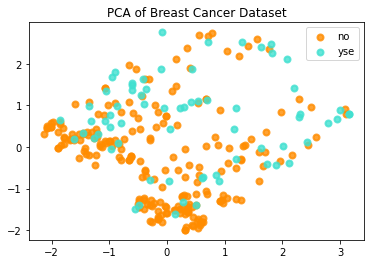

In [36]:
target_names = ['no','yse']

plt.figure()
colors = ['darkorange','turquoise']

for color, i, target_names in zip(colors, [0,1], target_names):
    plt.scatter(X_r[y == i, 0], X_r[y == i, 1], color=color, alpha= .8, lw=2, label= target_names)

plt.legend(scatterpoints=1)
plt.title("PCA of Breast Cancer Dataset")

#### 3D Visualization

In [37]:
pca3 = PCA(n_components=3)
X_r3 = pca3.fit_transform(X)

<Figure size 432x288 with 0 Axes>

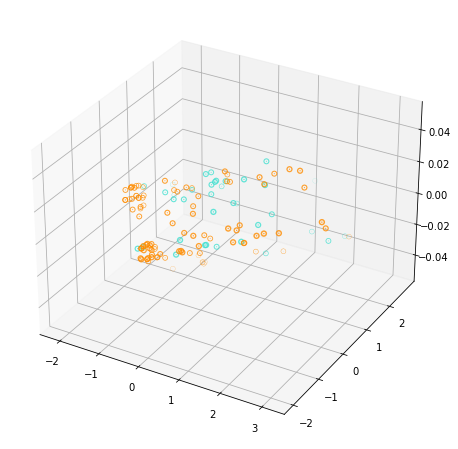

In [38]:
from mpl_toolkits.mplot3d import Axes3D

plt.figure()
fig = plt.figure(figsize = (10,8))
ax = fig.add_subplot(111,projection='3d')

for color, i, target_name in zip(colors,[0,1],target_names):
    plt.scatter(X_r3[y == i, 0],X_r3[y == i, 1],X_r3[y == i, 2],color=color, alpha=.8,lw=5,label=target_name)
    
plt.show()

#### Explained Variance

In [39]:
pca3.explained_variance_ratio_

array([0.1352274 , 0.13144592, 0.10988892])

In [40]:
pca3.explained_variance_ratio_.sum()

0.37656224474471783